<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [19]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : true



-------------------------------------------------------------------------


Résultats de : LA et newton appliqué à f1:
  * x0       = 

[0, 1, 1]


  * x_sol    = [0.5000000120317563, 1.2499999939841218, 0.5000000120317561]
  * f(x_sol) = 2.2499998917141957
  * nb_iters = 9
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]


-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0.5, 1.25, 1.0]
  * x_sol    = [0.5000002259296457, 1.2499998870351772, 0.5000002259296455]
  * f(x_sol) = 2.2499979666336483
  * nb_iters = 8
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]


-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f2:
  * x0       = [1, 0]
  * x_sol    = [0.9072336571162266, 0.8227549044924193]
  * f(x_sol) = 0.008615707033558758
  * nb_iters = 5
  * flag     = 0
  * solution = [0.9072339605110892, 0.82275545631455]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f2:
  * x0       = [0.8660254037844386, 0.8660254037844386]
  * x_sol    = [0.9072336571162514, 0.8227549044924647]
  * f(x_sol) = 0.008615707033554137
  * nb_iters = 5
  * flag     = 0
  * solution = [0.9072339605110892, 0.82275545631455]


-------------------------------------------------------------------------
Résultats de : LA et rc-cauchy appliqué à f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.49999952714981527, 1.2500000822020252, 0.5000004727699013]
  * f(x_sol) = 2.2500000003617493
  * nb_iters = 30
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et rc-cauchy appliqué à f1:
  * x0       = [0.5, 1.25, 1.0]
  * x_sol    = [0.4999931542633984, 1.250000012917247, 0.5000068457323988]
  * f(x_sol) = 2.250000000112641
  * nb_iters = 34
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]


-------------------------------------------------------------------------
Résultats de : LA et rc-cauchy appliqué à f2:
  * x0       = [1, 0]
  * x_sol    = [0.9072364550160327, 0.8227602681620451]
  * f(x_sol) = 0.008615169696606667
  * nb_iters = 9
  * flag     = 0
  * solution = [0.9072339605110892, 0.82275545631455]
-------------------------------------------------------------------------
Résultats de : LA et rc-cauchy appliqué à f2:
  * x0       = [0.8660254037844386, 0.8660254037844386]
  * x_sol    = [0.9072339876425813, 0.8227556157179988]
  * f(x_sol) = 0.00861563862021862
  * nb_iters = 13
  * flag     = 0
  * solution = [0.9072339605110892, 0.82275545631455]


-------------------------------------------------------------------------
Résultats de : LA et rc-gct appliqué à f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.5000000120317563, 1.249999993984122, 0.5000000120317563]
  * f(x_sol) = 2.249999891714195
  * nb_iters = 9
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et rc-gct appliqué à f1:
  * x0       = [0.5, 1.25, 1.0]
  * x_sol    = [0.5000002259296458, 1.249999887035177, 0.5000002259296458]
  * f(x_sol) = 2.2499979666336474
  * nb_iters = 8
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et rc-gct appliqué à f2:
  * x0       = [1, 0]
  * x_sol    = [0.9072336571162266, 0.8227549044924193]
  * f(x_sol) = 0.008615707033558758
  * nb_iters = 5
  * flag     = 0
  * solution = [0.9072339605110892, 0.82275545631455]
-----------------------------------------

## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

1. La méthode du lagrangien augmenté permet de résoudre un problème d'optimisation contraint à partir de la résolution d'une suite de problème d'optimisation sans contraint. Pour un problème d'optimisation contraint de la forme (avec les fonctions/variables de bonnes dimensions et vérifiant les bonnes propriétés) :

    $$
    \mathbb{P} : \underset{x\in \mathbb{R}^n}{min} \hskip{0.2cm} f(x) \text{ sous la contrainte } c(x)=0_{\mathbb{R}^n}
    $$

    Elle associe une suite de problème sans contrainte de la forme : 

    $$
    \mathbb{P}_k : \underset{x\in \mathbb{R}^n}{min} \hskip{0.2cm} L_A(x, \lambda_k, \mu_k) = f(x) + \lambda_k^T c(x) + \frac{\mu_k}{2}||c(x)||^2
    $$

    L'itéré $x_{k+1}$ est obtenu en résolvant $\mathbb{P}_k$ à l'aide des méthodes vu précédemment. Et à chaque itération $k$, les paramètres $\lambda_k$ et $\mu_k$ sont mis à jour bien évidemment. $lambda_k$ correspond aux multiplicateurs de Lagrande "classique" et $\mu_k$ représente un paramètre de pénalité, en effet ce dernier suit la règle suivante :

    * Augmentation de $\mu_k$ pour l'itération suivante si à notre itération $k$ les contraintes ne sont que satisfaites approximativement afin de forcer la convergence vers une solution satisfaisant mieux les contraintes. 
    Cette augmentation est effectuée par une multiplication par $\tau > 1$ : $\mu_{k+1}$ = $\tau \cdot \mu_{k}$ 

    * Dimunition de $\mu_k$ ou conservation du même pour l'itération suivante si à notre itération $k$ les contraintes sont satisfaites suffisament pour accélérer la convergence. Dans notre cas, nous allons simplement garder $\mu_{k+1} = \mu_k$

    A chaque itération $k$, les contraintes sont suffisament satisfaites si $||c(x_{k+1})|| < \eta_k$, $\hskip{0.1cm}$ si la condition est satisfaite alors on met à jour les multiplicateurs de Lagrange
    $$\lambda_{k+1} = \lambda_{k} + \mu_k c(x_{k+1})
    $$ 
    sinon on conserve les mêmes multiplicateurs.

    Dans la suite, nous allons étudier les variations des itérés $\mu_k$ et $\lambda_k$ pour la fonction $f_1$ définie précédemment avec la contrainte $c_2$ définie par : 

    $$
    \forall (x_1, x_2, x_3)\in \mathbb{R}^2, \hskip{0.1cm} c_1(x_1, x_2) = x_1 + x_3 - 1
    $$

    Avec le point initial $x_0 = (0, 0, 1)$ et les différents algorithmes implémentés afin de résoudre les différents problèmes $\mathbb{P}_k$

-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.5000000120317563, 1.2499999939841218, 0.5000000120317561]
  * f(x_sol) = 2.2499998917141957
  * nb_iters = 9
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
  * λs = [2.0, 2.0, 2.0, 4.247191011235952, 4.247191011235952, 4.486536799414925, 4.499283024820915, 4.499961817889886, 4.499997966633192, 4.499997966633192]
  * μs = [10, 20, 40, 40, 80, 80, 80, 80, 80, 160]


-------------------------------------------------------------------------
Résultats de : LA et rc-cauchy appliqué à f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.49999952714981527, 1.2500000822020252, 0.5000004727699013]
  * f(x_sol) = 2.2500000003617493
  * nb_iters = 30
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
  * λs = [2.0, 2.0, 2.0, 4.181848625369458, 4.181848625369458, 4.476072640314531, 4.511804298200442, 4.511804298200442, 4.499406507589281, 4.500147700713651, 4.500147700713651, 4.500203659380187, 4.4895653553710595, 4.488990900575434, 4.488990900575434, 4.499930455413395, 4.500015272386893, 4.49987666721653, 4.49987666721653, 4.499963736156747, 4.499685423297553, 4.499685423297553, 4.49998443525131, 4.499973737670036, 4.499973737670036, 4.499991679693796, 4.5017098087838185, 4.50168529360197, 4.50168529360197, 4.500000658693882, 4.499999836592526]
  * μs = [10, 20, 40, 40, 80, 80, 80, 160, 160, 160, 320, 320, 320, 320, 640, 640, 640, 640, 1280, 1280, 1280, 2560, 2560,


-------------------------------------------------------------------------
Résultats de : LA et rc-gct appliqué à f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.5000000120317563, 1.249999993984122, 0.5000000120317563]
  * f(x_sol) = 2.249999891714195
  * nb_iters = 9
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
  * λs = [2.0, 2.0, 2.0, 4.247191011235952, 4.247191011235952, 4.486536799414925, 4.499283024820915, 4.499961817889869, 4.499997966633192, 4.499997966633192]
  * μs = [10, 20, 40, 40, 80, 80, 80, 80, 80, 160]


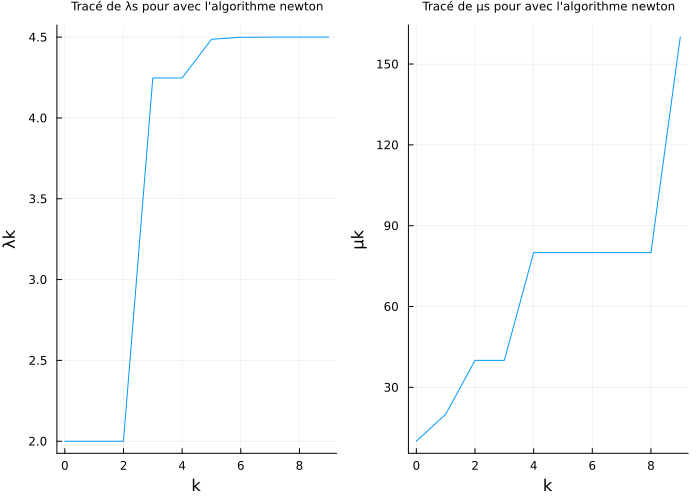

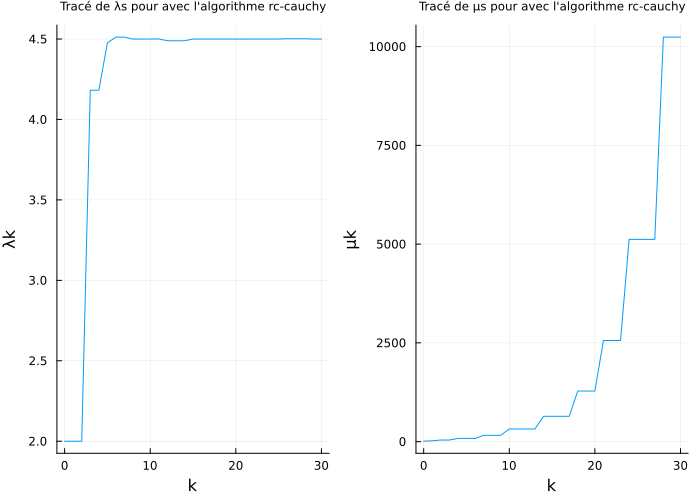

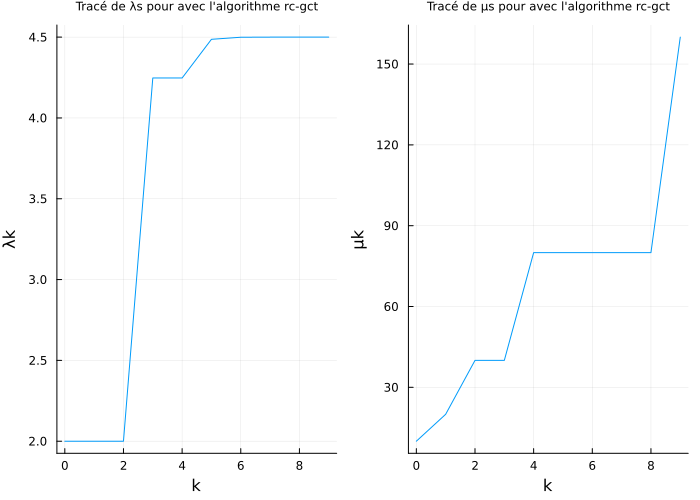

In [4]:
# Tracé de μs et λs pour la fonction f1 et la contrainte c1 pour les différents algo
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Initialisation
f1 = fct1; gradf1 = grad_fct1; hessf1 = hess_fct1; c1 = contrainte1; gradc1 = grad_contrainte1; hessc1 = hess_contrainte1
x0 = x01
algo = ["newton", "rc-cauchy", "rc-gct"]
tol = 1e-5
plotList = []

# Résolution du problème pour f1 et c1 avec les trois méthodes de résolution de pb d'optimisation sans contraintes
for a in algo
    # Application de l'algorithme du lagrandien augmenté avec l'algo a
    # et
    # Affichage des résultats
    x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f1, gradf1, hessf1, c1, gradc1, hessc1, x0, tol_abs=tol, tol_rel=tol, algo_noc=a)
    afficher_resultats("LA et " * a, "f1", x0, x_sol, f_sol, flag, nb_iters, sol_fct1_augm)
    println("  * λs = ", λs)
    println("  * μs = ", μs)
    nbIterIntervalle = range(0, nb_iters, nb_iters+1)

    # Affichage des itérés de λs et de μs en fonction de k sur une figure
    p1 = plot(nbIterIntervalle, λs, label = false, xlabel = "k", ylabel = "λk", title = "Tracé de λs pour avec l'algorithme " * a)
    p2 = plot(nbIterIntervalle, μs, label = false, xlabel = "k", ylabel = "μk", title = "Tracé de μs pour avec l'algorithme " * a)
    p = plot(p1, p2, layout = (1, 2), titlefontsize = 8, size = (700, 500))
    push!(plotList, p)
end

# Ordonnement des affichages
sleep(0.5)
# Affichage de tous les plots
for p in plotList
    display(p)
end

> Comme attendu, pour une même itération $k$, lorsque $\mu_k$ croit à la prochaine itération, alors $\lambda_k$ conserve la même valeur. De même, pour une même itération $k$, lorsque $\lambda_k$ varie à la prochaine itération, alors $\mu_k$ conserve la même valeur. Cela est facilement remarquable au niveau des plateaux des tracés.

2. Le paramètre $\tau$ est celui qui permet d'augmenter la valeur de $\mu$ d'une itération à une autre. Nous allons dans la suite étudier l'influence de ce paramètre sur le nombre d'itération. Pour cela, nous choisissons la fonction $f_1$ et la contrainte $c_1$ définie à la question précédente et nous faisons varier la valeur de $\tau$ dans l'intervalle $[1; 30]$. Nous choisissons aussi le point initial $(0, 1, 1)$.

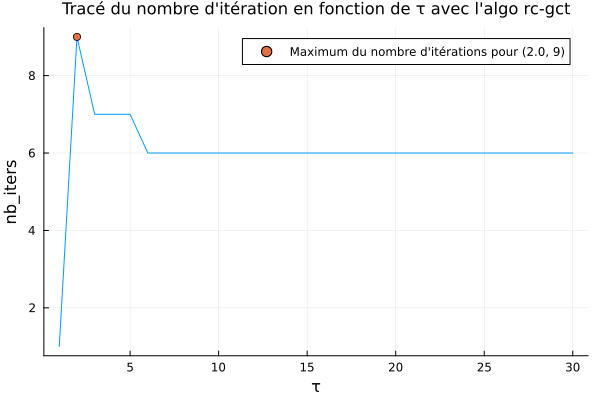

In [18]:
# Tracé du nombre d'itération en fonction de τ avec l'algo rc-gct pour la fonction f1 et le pt initial x01
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Initialisation
f = fct1; gradf = grad_fct1; hessf = hess_fct1; c = contrainte1; gradc = grad_contrainte1; hessc = hess_contrainte1
x0 = x01
a = "rc-gct"
tol = 1e-5
τIntervalle = range(1, 30, 30)
nbIterList = []

# On détermine le nombre d'itération pour chaque τ
for t in τIntervalle
    x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f, gradf, hessf, c, gradc, hessc, x0, tol_abs = tol, tol_rel = tol, algo_noc = a, τ = t)
    push!(nbIterList, nb_iters)
end

plot(τIntervalle, nbIterList, label = false, xlabel = "τ", ylabel = "nb_iters", title = "Tracé du nombre d'itération en fonction de τ avec l'algo " * a, titlefontsize = 11)

# Affichage du maximum
maxIter = maximum(nbIterList)
maxIterIndice = argmax(nbIterList)
scatter!([τIntervalle[maxIterIndice]], [maxIter], label = "Maximum du nombre d'itérations pour (" * 
                                                            string(τIntervalle[maxIterIndice]) * ", " * string(maxIter) * ")")

Nous faisons le même tracé mais pour la fonction $f_2$ et le point initial $(1, 0)$ ainsi que la contrainte $c_2$ définie par : 
$$
\forall (x_1, x_2)\in \mathbb{R}^2, \hskip{0.1cm} c_2(x_1, x_2) = x_1^2 + x_2^2 - 1,5
$$


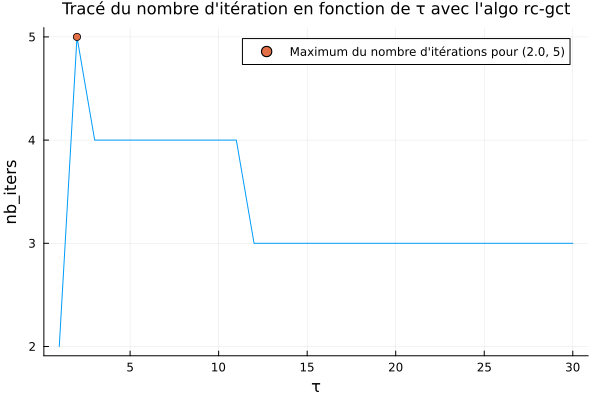

In [17]:
# Tracé du nombre d'itération en fonction de τ avec l'algo rc-gct pour la fonction f2 et le pt initial x03
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Initialisation
f = fct2; gradf = grad_fct2; hessf = hess_fct2; c = contrainte2; gradc = grad_contrainte2; hessc = hess_contrainte2
x0 = x03
a = "rc-gct"
tol = 1e-5
τIntervalle = range(1, 30, 30)
nbIterList = []

# On détermine le nombre d'itération pour chaque τ
for t in τIntervalle
    x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f, gradf, hessf, c, gradc, hessc, x0, tol_abs = tol, tol_rel = tol, algo_noc = a, τ = t)
    push!(nbIterList, nb_iters)
end

plot(τIntervalle, nbIterList, label = false, xlabel = "τ", ylabel = "nb_iters", title = "Tracé du nombre d'itération en fonction de τ avec l'algo " * a, titlefontsize = 11)

# Affichage du maximum
maxIter = maximum(nbIterList)
maxIterIndice = argmax(nbIterList)
scatter!([τIntervalle[maxIterIndice]], [maxIter], label = "Maximum du nombre d'itérations pour (" * 
                                                            string(τIntervalle[maxIterIndice]) * ", " * string(maxIter) * ")")

> Dans les deux tracés, on remarque une augmentation du nombre d'itérations généralement (par rapport à $\tau=1$) ce qui confirme bien qu'imposer une plus grande pénalité sur les contraintes ralentit la convergence de l'algorithme afin de mieux satisfaire les contraintes.

> Il faut également remarquer qu'une augmentation de $\tau$ au delà d'un certain seuil ($\tau \geq 1$) permet d'avoir un nombre d'itérations moindre que le maximum (mais toujours au dessu du nombre d'itérations pour $\tau=1$), cela peut s'interpréter par le fait qu'une augmentation trop soudaine de la pénalité sur les contraintes mène à une satisfaction plus rapide des contraintes et donc à une stagnation des paramètres de pénalité et donc à une convergence un peu plus rapide tout en respectant la contrainte.